# Imports 👇

In [3]:
import pandas
import numpy
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report
import seaborn
import matplotlib.pyplot as pyplot

##### 👇 setting the matplotlib configurations

In [4]:
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12)

# Data Reading 👇

In [5]:
data=pandas.read_csv('./Crop_recommendation.csv')

### 👇 cheking the columns, data, data type information, correlation between attributes

In [6]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [7]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [10]:
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


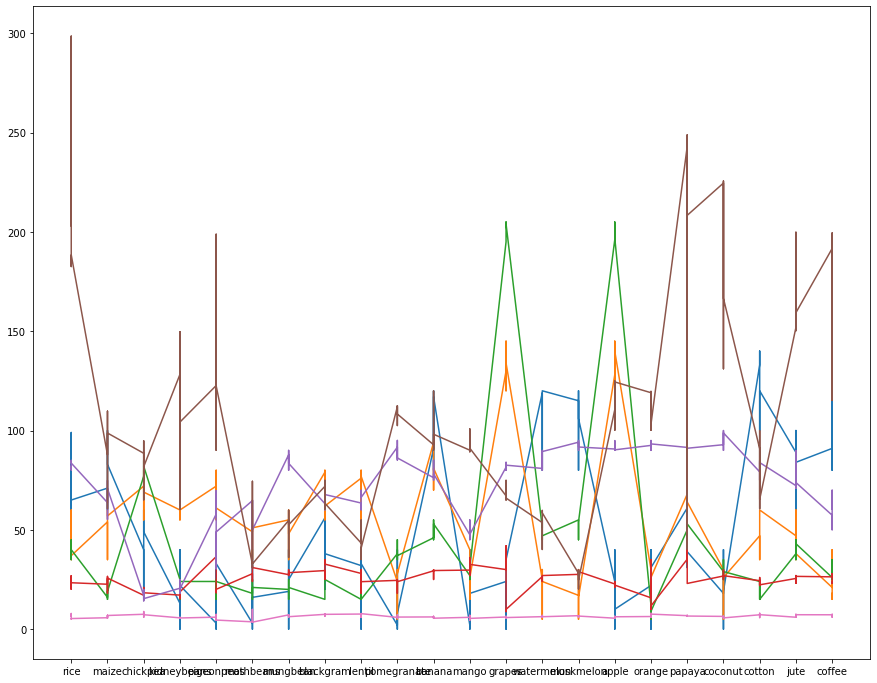

In [11]:
pyplot.plot(data['label'],data[['N','P','K','temperature','humidity','rainfall','ph']])

## 👇 checking the available number of classes

In [12]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# Data Reduction
### Column level and row level both are used here

#### 1. Column Level Reduction (Dimention reduction)
👇 here we are reducing the number of columns (features)

In [13]:
data=data.drop(['N','P','K','ph'],axis=1)

In [14]:
data.columns

Index(['temperature', 'humidity', 'rainfall', 'label'], dtype='object')

In [15]:
data

,temperature,humidity,rainfall,label
0,20.879744,82.002744,202.935536,rice
1,21.770462,80.319644,226.655537,rice
2,23.004459,82.320763,263.964248,rice
3,26.491096,80.158363,242.864034,rice
4,20.130175,81.604873,262.717340,rice
...,...,...,...,...
2195,26.774637,66.413269,177.774507,coffee
2196,27.417112,56.636362,127.924610,coffee
2197,24.131797,67.225123,173.322839,coffee
2198,26.272418,52.127394,127.175293,coffee


#### 2. Row lavel Reduction (Data reduction)
👇 here we are reducing number of rows

In [16]:
classes_list=["rice", "maize", "cotton", "coconut",  "orange", "apple", "watermelon","jute", "mango","coffee"]
def get_class_number(class_name):
    if class_name=='rice':
        return 0
    if class_name=='maize':
        return 1
    if class_name=='cotton':
        return 2
    if class_name=='coconut':
        return 3
    if class_name=='orange':
        return 4
    if class_name=='apple':
        return 5
    if class_name=='jute':
        return 6
    if class_name=='mango':
        return 7
    if class_name=='watermelon':
        return 8
    if class_name=='coffee':
        return 9

In [17]:
Analysis_data=data[data['label']=='rice']
for i in range(1,len(classes_list)):
    Analysis_data=pandas.concat([Analysis_data,data[data['label']==classes_list[i]]])
data=Analysis_data

### 👇 Tranformed Data

In [18]:
data

,temperature,humidity,rainfall,label
0,20.879744,82.002744,202.935536,rice
1,21.770462,80.319644,226.655537,rice
2,23.004459,82.320763,263.964248,rice
3,26.491096,80.158363,242.864034,rice
4,20.130175,81.604873,262.717340,rice
...,...,...,...,...
2195,26.774637,66.413269,177.774507,coffee
2196,27.417112,56.636362,127.924610,coffee
2197,24.131797,67.225123,173.322839,coffee
2198,26.272418,52.127394,127.175293,coffee


In [19]:
data['label'].value_counts()

rice          100
maize         100
cotton        100
coconut       100
orange        100
apple         100
watermelon    100
jute          100
mango         100
coffee        100
Name: label, dtype: int64

In [21]:
data.to_csv("./Crop_Suggestion.csv",index=False)

# Data Visualization 👇

In [18]:
data['class_number']=data['label'].apply(get_class_number)

In [19]:
data

,temperature,humidity,rainfall,label,class_number
0,20.879744,82.002744,202.935536,rice,0
1,21.770462,80.319644,226.655537,rice,0
2,23.004459,82.320763,263.964248,rice,0
3,26.491096,80.158363,242.864034,rice,0
4,20.130175,81.604873,262.717340,rice,0
...,...,...,...,...,...
2195,26.774637,66.413269,177.774507,coffee,9
2196,27.417112,56.636362,127.924610,coffee,9
2197,24.131797,67.225123,173.322839,coffee,9
2198,26.272418,52.127394,127.175293,coffee,9


### 👇 Attribute comparison paring graph
here each graph is drawn by one to one manner

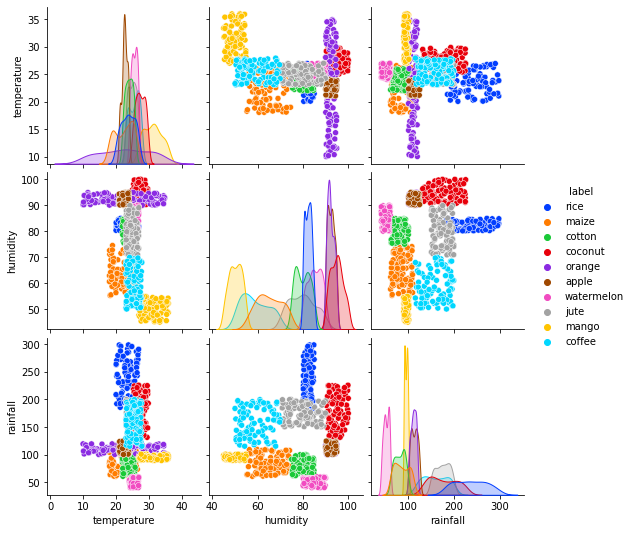

In [20]:
seaborn.pairplot(data.iloc[:,:4], hue="label",palette="bright")

### 👇 Plot of data point values 

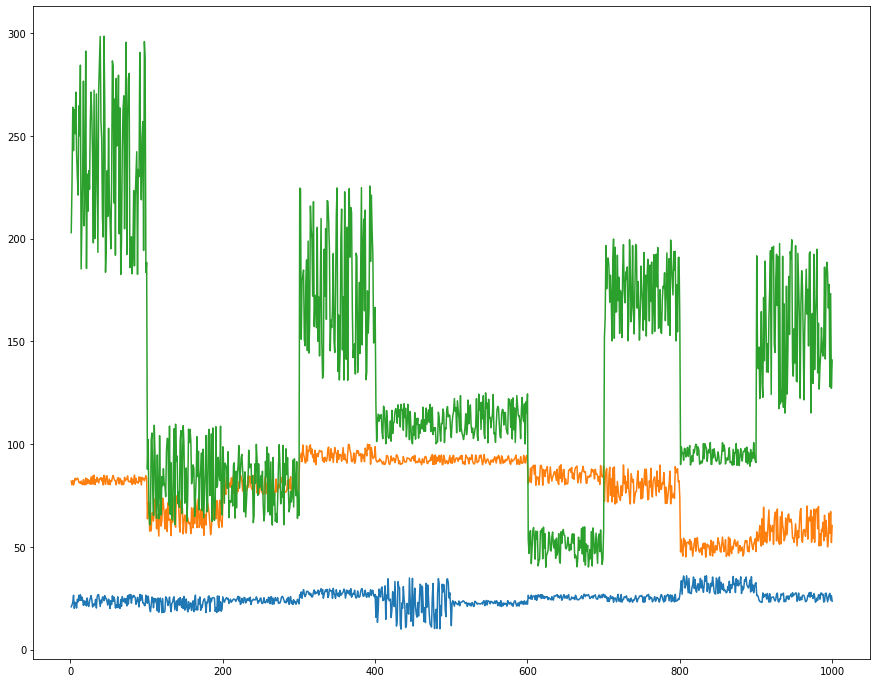

In [21]:
pyplot.plot([i for i in range(1,len(data)+1)],data[['temperature','humidity','rainfall']])

### 👇 3D plot of given data points

Text(0.5, 0, 'rainfall')

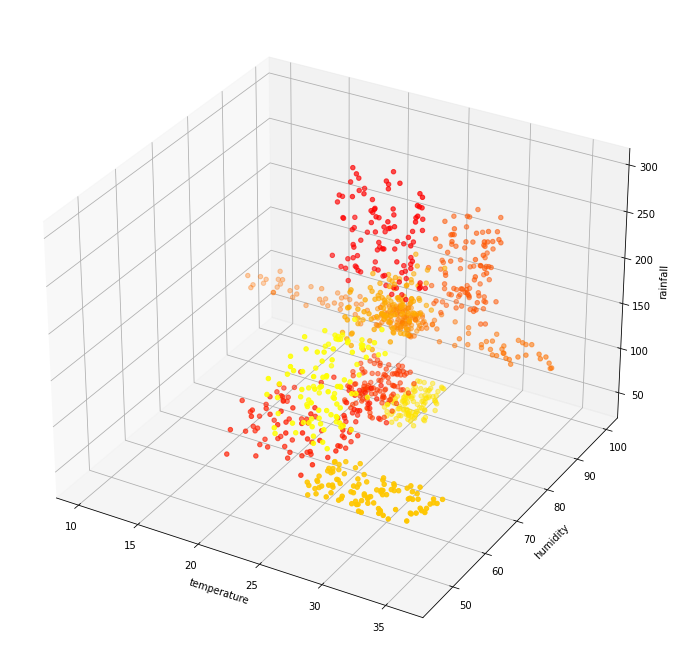

In [22]:
plotter = pyplot.subplot(projection='3d')
plotter.scatter3D(data.to_numpy()[:,0], data.to_numpy()[:, 1] ,data.to_numpy()[:, 2],c=data['class_number'], cmap='autumn')
plotter.set_xlabel('temperature')
plotter.set_ylabel('humidity')
plotter.set_zlabel('rainfall')

# Data Preparation

### Suffling the data set 👇
this is to get splitted data, that have all type of the classes in training and testing

In [23]:
shuffled_Data=data.sample(frac=1)

## Splitting the dataset into training and testing 👇

For Training 85% data is being used and for testing 15% data is used from the given data

means 850 rows will be used for training and 150 rows will be used for testing

In [24]:
Training_Data = shuffled_Data[:850]
Testing_Data = shuffled_Data[850:]

In [25]:
Training_Data['label'].value_counts()

maize         90
coffee        89
watermelon    88
coconut       86
orange        84
cotton        84
apple         84
jute          83
rice          82
mango         80
Name: label, dtype: int64

In [26]:
Training_Data

,temperature,humidity,rainfall,label,class_number
139,18.980273,74.526008,94.262494,maize,1
121,18.147101,71.094453,88.077537,maize,1
103,19.972160,57.682729,60.651715,maize,1
81,25.429775,82.946826,195.357454,rice,0
2035,25.124177,85.725306,159.571809,jute,6
...,...,...,...,...,...
1572,21.198522,92.155951,105.855435,apple,5
1583,23.761218,93.661643,100.825956,apple,5
1803,25.028872,91.537209,179.824894,coconut,3
1699,11.698946,93.256389,103.200599,orange,4


### 👇 Visualizing Training Data

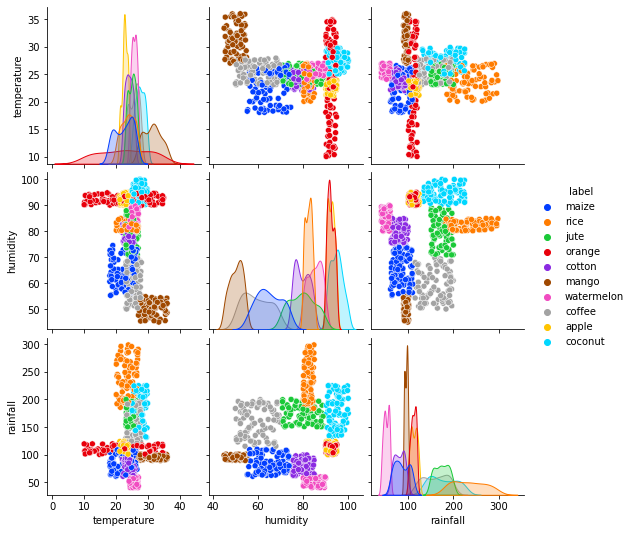

In [27]:
seaborn.pairplot(Training_Data.iloc[:,:4], hue="label",palette="bright")

Text(0.5, 0, 'rainfall')

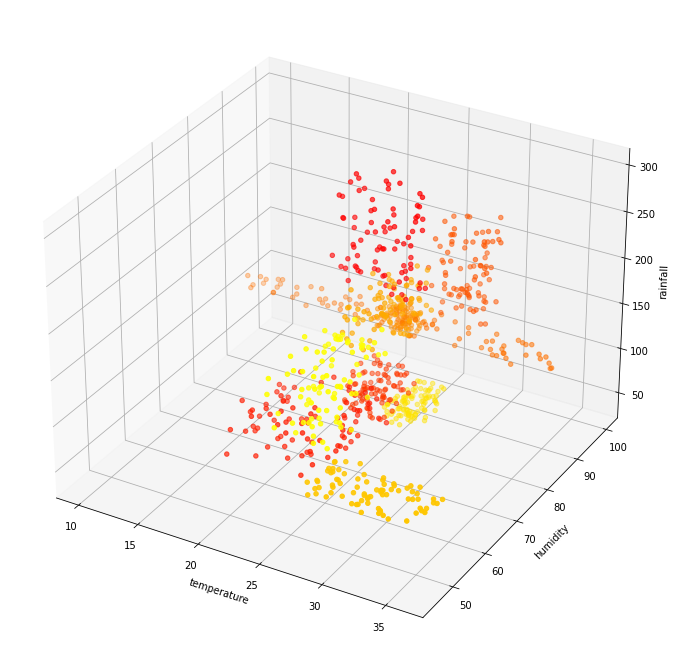

In [28]:
plotter = pyplot.subplot(projection='3d')
plotter.scatter3D(Training_Data.to_numpy()[:,0], Training_Data.to_numpy()[:, 1] ,Training_Data.to_numpy()[:, 2],c=Training_Data['class_number'], cmap='autumn')
plotter.set_xlabel('temperature')
plotter.set_ylabel('humidity')
plotter.set_zlabel('rainfall')

### 👇 Visualizing Testing Data

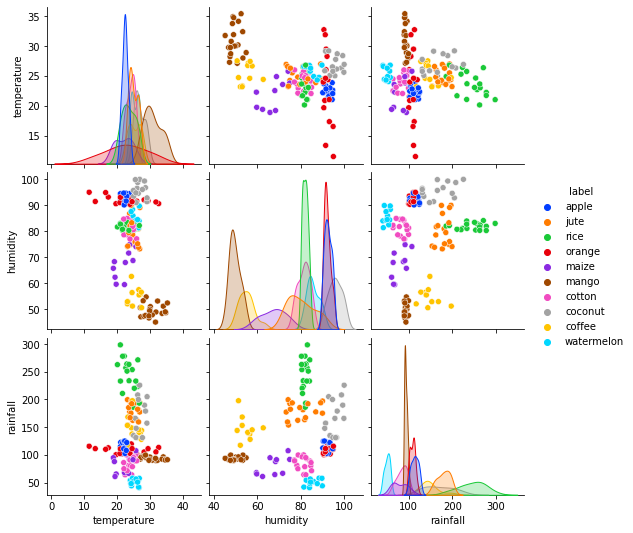

In [29]:
seaborn.pairplot(Testing_Data.iloc[:,:4], hue="label",palette="bright")

Text(0.5, 0, 'rainfall')

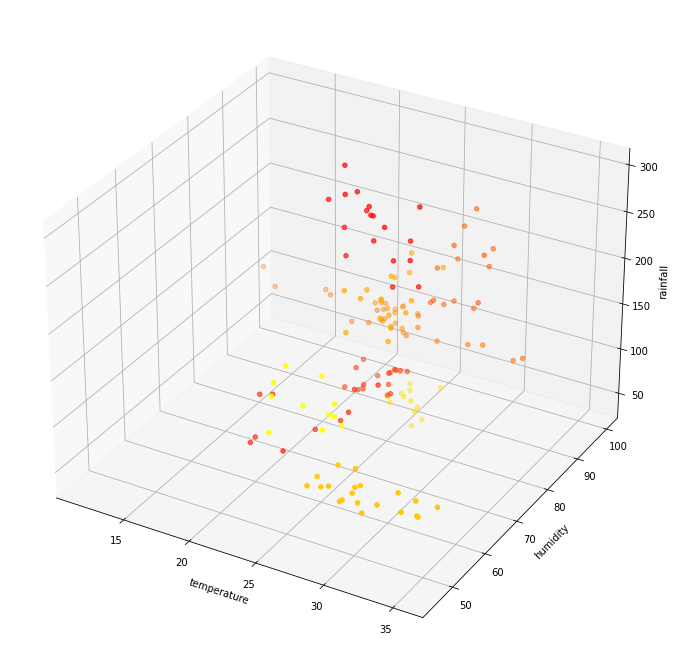

In [30]:
plotter = pyplot.subplot(projection='3d')
plotter.scatter3D(Testing_Data.to_numpy()[:,0], Testing_Data.to_numpy()[:, 1] ,Testing_Data.to_numpy()[:, 2],c=Testing_Data['class_number'], cmap='autumn')
plotter.set_xlabel('temperature')
plotter.set_ylabel('humidity')

plotter.set_zlabel('rainfall')

## Dividing the training data features and labels 👇 
this will be used for training of SVM model

In [31]:
training_Labels=Training_Data['label']
training_class_numbers=Training_Data['class_number']
training_Features=Training_Data.drop(['label','class_number'],axis=1)

In [32]:
training_Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 139 to 44
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  850 non-null    float64
 1   humidity     850 non-null    float64
 2   rainfall     850 non-null    float64
dtypes: float64(3)
memory usage: 26.6 KB


In [33]:
training_Labels.value_counts()

maize         90
coffee        89
watermelon    88
coconut       86
orange        84
cotton        84
apple         84
jute          83
rice          82
mango         80
Name: label, dtype: int64

## dividing the testing data features and labels 👇 
this will be used for testing the SVM model

In [34]:
testing_Labels=Testing_Data['label']
testing_class_numbers=Testing_Data['class_number']
testing_Features=Testing_Data.drop(['label','class_number'],axis=1)

In [35]:
testing_Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1570 to 1863
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  150 non-null    float64
 1   humidity     150 non-null    float64
 2   rainfall     150 non-null    float64
dtypes: float64(3)
memory usage: 4.7 KB


In [36]:
testing_Labels.value_counts()

mango         20
rice          18
jute          17
apple         16
orange        16
cotton        16
coconut       14
watermelon    12
coffee        11
maize         10
Name: label, dtype: int64

# Creating the SVM model instance(object) 👇

In [37]:
model=svm.SVC(kernel='linear') # 👈 this givs highest accuracy
# model=svm.SVC(kernel='poly')
# model=svm.SVC(kernel='rbf') # 👈 this was default kernal if we not give any kernal value


# 👇 give low accuracy
# model=svm.SVC(kernel='sigmoid')

### fitting the model 👇

In [38]:
model.fit(training_Features,training_Labels)

SVC(kernel='linear')

#### 👇Printing the support vectors values

In [39]:
model.support_vectors_

array([[ 23.80593812,  92.48879468, 119.6335548 ],
       [ 21.22503442,  90.09877774, 113.9760462 ],
       [ 21.11478672,  90.31528693, 104.5086618 ],
       [ 22.71271308,  90.45261746, 109.8852597 ],
       [ 22.13450646,  94.67695747, 112.9203223 ],
       [ 21.91191314,  91.68748063, 117.0761277 ],
       [ 21.41363812,  92.99124545, 118.3979065 ],
       [ 22.49095104,  91.70292746, 124.3915101 ],
       [ 22.45696744,  94.76285385, 114.8407725 ],
       [ 21.19909519,  90.80819418, 103.6838922 ],
       [ 22.76643029,  92.12438519, 120.4359949 ],
       [ 22.43324518,  92.48667725, 119.1025189 ],
       [ 21.18667419,  91.13435689, 122.233323  ],
       [ 21.17089176,  90.23730166, 123.6495149 ],
       [ 23.71475278,  91.53331177, 121.8961665 ],
       [ 23.64142354,  93.74461474, 116.6912176 ],
       [ 22.69780133,  92.82223419, 105.0508234 ],
       [ 23.8812458 ,  93.45067555, 104.9116663 ],
       [ 22.35628673,  91.92360477, 107.7697413 ],
       [ 21.37784654,  92.72043

### 👇 this is the number of the support vectors generated for respective class

In [40]:
model.n_support_

array([80,  5,  5,  7, 24, 11,  6, 82, 18,  3])

In [41]:
len(model.support_vectors_)

241

## Visualization of Support Vectors 👇

### 👇 2D plot

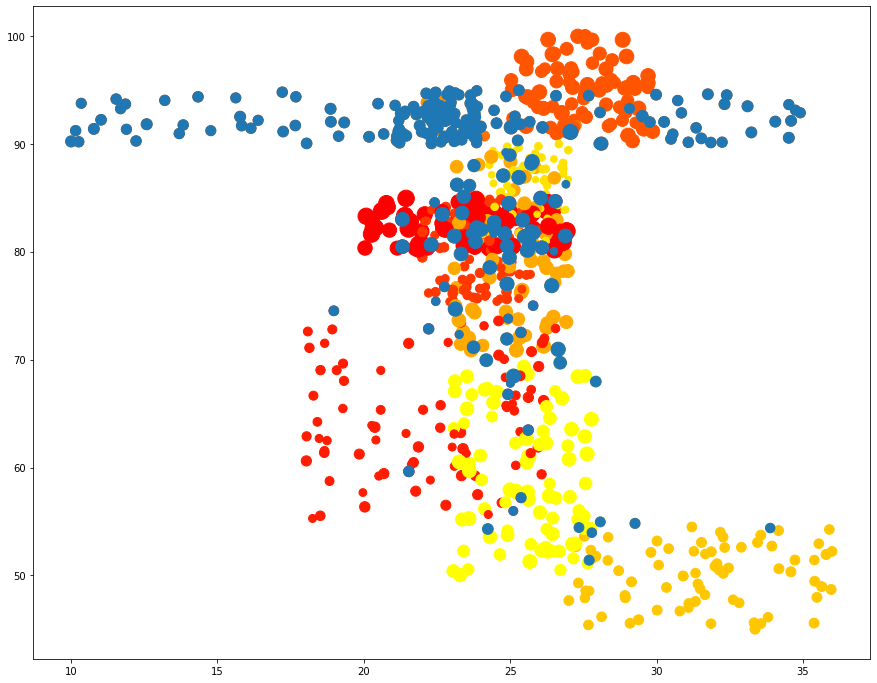

In [42]:
pyplot.scatter(training_Features.to_numpy()[:, 0],training_Features.to_numpy()[:, 1],training_Features.to_numpy()[:, 2],c=training_class_numbers, cmap='autumn')
pyplot.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],model.support_vectors_[:,2])

### 👇 3D plot

Text(0.5, 0, 'rainfall')

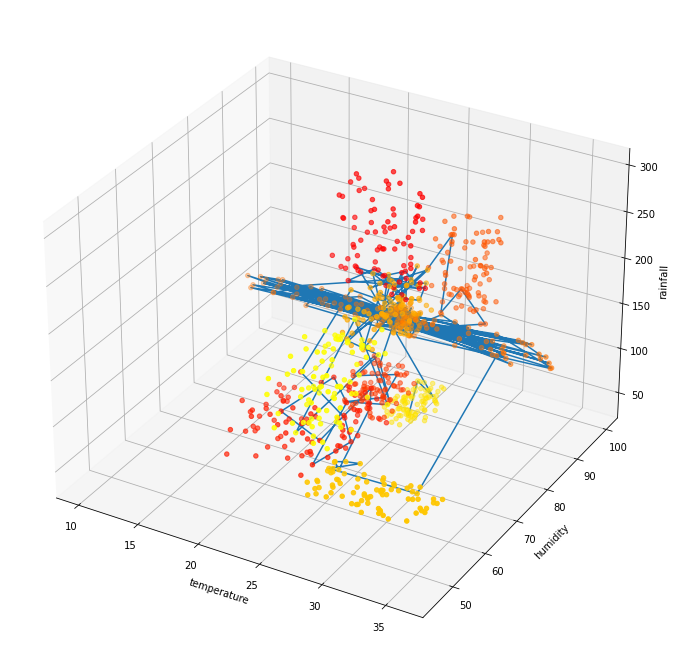

In [43]:
plotter = pyplot.subplot(projection='3d')
plotter.scatter3D(training_Features.to_numpy()[:, 0], training_Features.to_numpy()[:, 1] ,training_Features.to_numpy()[:, 2],c=training_class_numbers, cmap='autumn')
plotter.plot3D(model.support_vectors_[:,0],model.support_vectors_[:,1],model.support_vectors_[:,2])
plotter.set_xlabel('temperature')
plotter.set_ylabel('humidity')
plotter.set_zlabel('rainfall')

## 👆 Blue colored lines are Support Vectors
others are Datapoints


### Now model is Trained 👆

## ________________________________________________________________________

## Optional Part 👇
### checking model on training data to check training accuracy (not needed)

              precision    recall  f1-score   support

        rice       0.53      0.50      0.51        84
       maize       0.99      1.00      0.99        86
      cotton       1.00      1.00      1.00        89
     coconut       1.00      1.00      1.00        84
      orange       0.91      0.94      0.92        83
       apple       1.00      1.00      1.00        90
  watermelon       1.00      1.00      1.00        80
        jute       0.52      0.55      0.53        84
       mango       0.95      0.90      0.92        82
      coffee       1.00      1.00      1.00        88

    accuracy                           0.89       850
   macro avg       0.89      0.89      0.89       850
weighted avg       0.89      0.89      0.89       850



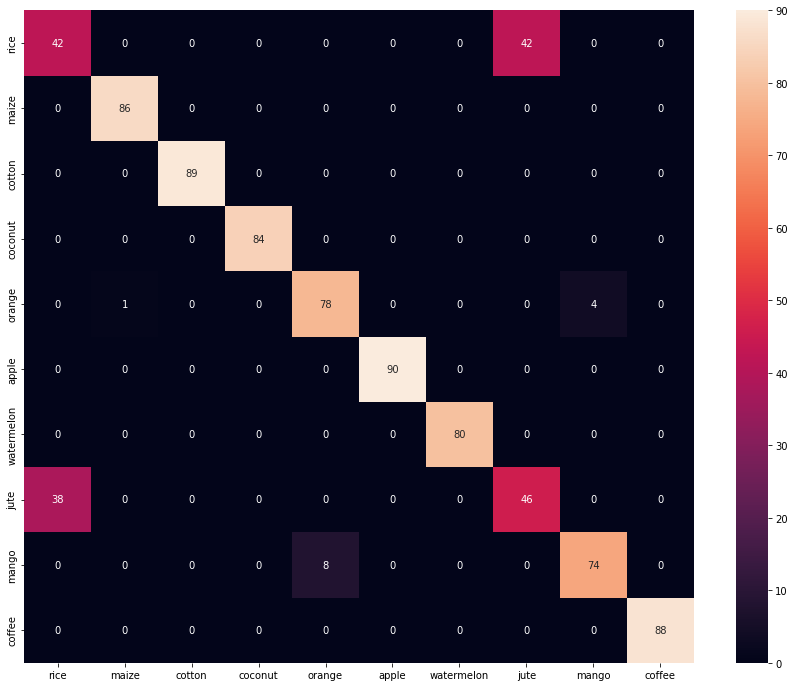

In [44]:
training_predicted_values=model.predict(training_Features)
training_classification_data=confusion_matrix(training_Labels,training_predicted_values)
seaborn.heatmap(training_classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)
print(classification_report(training_Labels,training_predicted_values,target_names=classes_list))

Training accuracy is 89%

# ________________________________________

# Now Testing the model 👇

In [45]:
predicted_values=model.predict(testing_Features)

In [46]:
predicted_values

array(['apple', 'jute', 'rice', 'orange', 'rice', 'maize', 'mango',
       'jute', 'cotton', 'mango', 'cotton', 'mango', 'coconut', 'apple',
       'orange', 'cotton', 'orange', 'mango', 'mango', 'coconut',
       'orange', 'apple', 'mango', 'coffee', 'mango', 'orange', 'cotton',
       'apple', 'orange', 'maize', 'cotton', 'rice', 'orange', 'orange',
       'rice', 'watermelon', 'rice', 'coconut', 'watermelon', 'coffee',
       'watermelon', 'maize', 'watermelon', 'jute', 'apple', 'coffee',
       'orange', 'mango', 'cotton', 'coffee', 'coconut', 'rice', 'mango',
       'jute', 'cotton', 'jute', 'jute', 'apple', 'rice', 'apple',
       'mango', 'coconut', 'rice', 'orange', 'cotton', 'jute', 'coconut',
       'rice', 'apple', 'jute', 'rice', 'mango', 'jute', 'apple',
       'cotton', 'cotton', 'watermelon', 'coconut', 'coconut', 'coconut',
       'maize', 'orange', 'orange', 'apple', 'mango', 'watermelon',
       'watermelon', 'coconut', 'jute', 'jute', 'maize', 'mango', 'mango',
     

### Following will show that what is actual value and what is predicted by model 👇

In [47]:
predicted_values=list(predicted_values)
testing_Labels=list(testing_Labels)
print("Actual Values --> Predicted values")
for i in range(len(predicted_values)):
    print("     ",testing_Labels[i]," --> ",predicted_values[i])

Actual Values --> Predicted values
      apple  -->  apple
      jute  -->  jute
      rice  -->  rice
      orange  -->  orange
      rice  -->  rice
      maize  -->  maize
      mango  -->  mango
      jute  -->  jute
      cotton  -->  cotton
      mango  -->  mango
      cotton  -->  cotton
      mango  -->  mango
      coconut  -->  coconut
      orange  -->  apple
      orange  -->  orange
      cotton  -->  cotton
      orange  -->  orange
      mango  -->  mango
      mango  -->  mango
      coconut  -->  coconut
      orange  -->  orange
      apple  -->  apple
      mango  -->  mango
      coffee  -->  coffee
      mango  -->  mango
      orange  -->  orange
      cotton  -->  cotton
      apple  -->  apple
      apple  -->  orange
      maize  -->  maize
      cotton  -->  cotton
      rice  -->  rice
      orange  -->  orange
      apple  -->  orange
      rice  -->  rice
      watermelon  -->  watermelon
      rice  -->  rice
      coconut  -->  coconut
      watermelon  

## plotting the confusion matrix for model of tested data 👇

In [48]:
classification_data=confusion_matrix(predicted_values,testing_Labels)

In [49]:
classification_data

array([[10,  0,  0,  0,  0,  0,  0,  4,  0,  0],
       [ 0, 14,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0,  0, 11,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 14,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  9,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0, 16,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 12]], dtype=int64)

<AxesSubplot:>

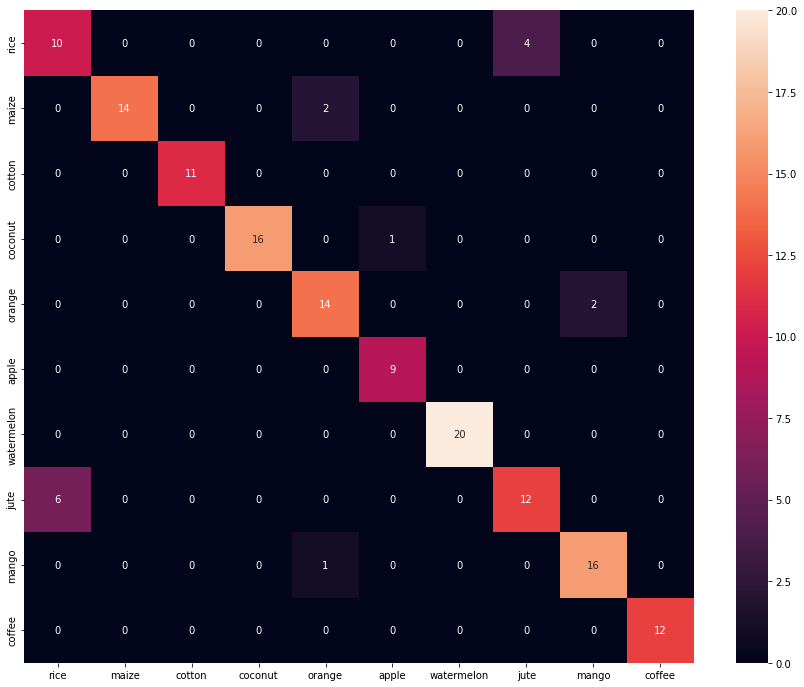

In [50]:
seaborn.heatmap(classification_data,annot=True,xticklabels=classes_list,yticklabels=classes_list)

## This is the calculation of accuracy of the model and precision of the respective classes 👇

In [51]:
print(classification_report(testing_Labels,predicted_values,target_names=classes_list))

              precision    recall  f1-score   support

        rice       0.71      0.62      0.67        16
       maize       0.88      1.00      0.93        14
      cotton       1.00      1.00      1.00        11
     coconut       0.94      1.00      0.97        16
      orange       0.88      0.82      0.85        17
       apple       1.00      0.90      0.95        10
  watermelon       1.00      1.00      1.00        20
        jute       0.67      0.75      0.71        16
       mango       0.94      0.89      0.91        18
      coffee       1.00      1.00      1.00        12

    accuracy                           0.89       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.89      0.89      0.89       150



## Testing on new Data 👇
for,


1) temperature= 30        <br/>
2) humidity=49       <br/>
3) rainfall= 95       <br/>

##### (Correct Output Should be Mango)

In [52]:
new_data=[30,49,95]
print(model.predict([new_data])[0])

mango
